# Ollama-Python: LLMs on Your Local Machine

### <span style="color:tomato;">Table of Contents</span>

1. **Pull Model**
2. **List Downloaded Models**
3. **Generate API**
    * Provide System Message
    * Stream Tokens
    * Multi-Modal Model (Text + Images)
4. **Chat API**
    * Provide System Message
    * Stream Tokens
5. **Embeddings API**
6. **Create Custom Model**


### <span style="color:tomato;">Installation</span>

* **pip install ollama**

<span style="color:tomato;">**NOTE**</span> -  Please make a NOTE that you need atleast **8 GB** of RAM to run LLMs on local machine. Majority of models have **7B** or more parameters. For running **7B** parameters model, you need **8 GB** of RAM and for larger models even more.

In [1]:
import ollama

## 1. Pull Model

In [2]:
response = ollama.pull(model="llama2")

response

{'status': 'success'}

In [3]:
response = ollama.pull(model="llama2", stream=True)

response

<generator object Client._stream at 0x7f1970d509e0>

In [4]:
for val in response:
    print(val)

{'status': 'pulling manifest'}
{'status': 'pulling 8934d96d3f08', 'digest': 'sha256:8934d96d3f08982e95922b2b7a2c626a1fe873d7c3b06e8e56d7bc0a1fef9246', 'total': 3826781184, 'completed': 3826781184}
{'status': 'pulling 8c17c2ebb0ea', 'digest': 'sha256:8c17c2ebb0ea011be9981cc3922db8ca8fa61e828c5d3f44cb6ae342bf80460b', 'total': 7020, 'completed': 7020}
{'status': 'pulling 7c23fb36d801', 'digest': 'sha256:7c23fb36d80141c4ab8cdbb61ee4790102ebd2bf7aeff414453177d4f2110e5d', 'total': 4766, 'completed': 4766}
{'status': 'pulling 2e0493f67d0c', 'digest': 'sha256:2e0493f67d0c8c9c68a8aeacdf6a38a2151cb3c4c1d42accf296e19810527988', 'total': 59, 'completed': 59}
{'status': 'pulling fa304d675061', 'digest': 'sha256:fa304d6750612c207b8705aca35391761f29492534e90b30575e4980d6ca82f6', 'total': 91, 'completed': 91}
{'status': 'pulling 42ba7f8a01dd', 'digest': 'sha256:42ba7f8a01ddb4fa59908edd37d981d3baa8d8efea0e222b027f29f7bcae21f9', 'total': 557, 'completed': 557}
{'status': 'verifying sha256 digest'}
{'sta

## 2. List Models

In [5]:
response = ollama.list()

type(response)

dict

In [6]:
for model in response["models"]:
    print(f"Model : {model['name']:18s}, Parameters : {model['details']['parameter_size']}, Quantization : {model['details']['quantization_level']}")

Model : codellama:latest  , Parameters : 7B, Quantization : Q4_0
Model : llama2:latest     , Parameters : 7B, Quantization : Q4_0
Model : llava:latest      , Parameters : 7B, Quantization : Q4_0
Model : mistral:latest    , Parameters : 7B, Quantization : Q4_0
Model : phi:latest        , Parameters : 3B, Quantization : Q4_0
Model : shakespeare:latest, Parameters : 7B, Quantization : Q4_0
Model : tinyllama:latest  , Parameters : 1B, Quantization : Q4_0
Model : vicuna:latest     , Parameters : 7B, Quantization : Q4_0


## 3. Generate Text

In [7]:
response = ollama.generate(model="llama2", prompt="Write a short paragraph introducing bill gates.")

type(response)

dict

In [8]:
response.keys()

dict_keys(['model', 'created_at', 'response', 'done', 'context', 'total_duration', 'load_duration', 'prompt_eval_count', 'prompt_eval_duration', 'eval_count', 'eval_duration'])

In [9]:
print(response["response"])

Bill Gates is a renowned American entrepreneur, software developer, and philanthropist. He co-founded Microsoft Corporation, the world's largest software company, with Paul Allen in 1975. Under his leadership, Microsoft became one of the most successful technology companies globally, revolutionizing the personal computer industry with innovative products like Windows, Office, and Visual Basic. In addition to his business ventures, Gates is also known for his charitable work through the Bill & Melinda Gates Foundation, which focuses on improving global healthcare and reducing poverty. With an estimated net worth of over $200 billion, Gates holds the Guinness World Record for the wealthiest individual in the world. His impact on the technology industry and philanthropy has been immense, earning him widespread recognition and admiration globally.


### Provide System Message

In [10]:
response = ollama.generate(model="llama2",
                           system="Act as if you are William Shakespeare.",
                           prompt="Write a short paragraph introducing bill gates.")

print(response["response"])


Hark, what news is this? A man of wealth and means,
A genius in the realm of technology, doth please!
'Tis Bill Gates, the mastermind behind the screens,
Whose coding prowess doth bring forth a world of gleams.

With Microsoft as his crown, he doth hold sway,
A visionary and philanthropist, in every way.
His mind doth race with thoughts of innovation,
As he doth strive to make the world a better nation.

A true gent and scholar, Bill Gates doth shine,
A beacon of hope, in this digital age divine.
So here's to him, our nod of gratitude and praise,
For all the wonders he hath brought unto our days.


### Stream Tokens

In [11]:
response = ollama.generate(model="llama2",
                           stream=True,
                           prompt="Write a short paragraph introducing bill gates.")

response

<generator object Client._stream at 0x7f1970d50f90>

In [12]:
for token in response:
    print(token)

{'model': 'llama2', 'created_at': '2024-02-24T14:09:31.291470028Z', 'response': '\n', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:31.43032902Z', 'response': 'B', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:31.610058509Z', 'response': 'ill', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:31.749899836Z', 'response': ' G', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:31.899795131Z', 'response': 'ates', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:32.092593449Z', 'response': ' is', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:32.239906647Z', 'response': ' a', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:32.375714064Z', 'response': ' vision', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:32.523229614Z', 'response': 'ary', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:32.659696152Z', 'response': ' e

{'model': 'llama2', 'created_at': '2024-02-24T14:09:43.382441391Z', 'response': ',', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:43.519731429Z', 'response': ' he', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:43.671192568Z', 'response': ' te', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:43.850712265Z', 'response': 'amed', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:44.031124199Z', 'response': ' up', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:44.168642004Z', 'response': ' with', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:44.316854298Z', 'response': ' Paul', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:44.488152049Z', 'response': ' Allen', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:44.669373874Z', 'response': ' to', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:44.812241326Z', 'respons

{'model': 'llama2', 'created_at': '2024-02-24T14:09:55.4568379Z', 'response': 'es', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:55.595783435Z', 'response': ' through', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:55.743645634Z', 'response': ' the', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:55.88308553Z', 'response': ' Bill', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:56.0318756Z', 'response': ' and', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:56.171858338Z', 'response': ' Mel', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:56.321083339Z', 'response': 'inda', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:56.460128952Z', 'response': ' G', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:56.610602591Z', 'response': 'ates', 'done': False}
{'model': 'llama2', 'created_at': '2024-02-24T14:09:56.750005924Z', 'response

In [13]:
response = ollama.generate(model="llama2",
                           stream=True,
                           prompt="Write a short paragraph introducing bill gates.")

tokens = [token["response"] for token in response]

print(tokens[:10])

['B', 'ill', ' G', 'ates', ' is', ' a', ' ren', 'owned', ' American', ' entrepr']


In [14]:
print("".join(tokens))

Bill Gates is a renowned American entrepreneur, software developer, and philanthropist. He co-founded Microsoft Corporation with Paul Allen in 1975, and the company's flagship product, Windows, revolutionized the personal computer industry. Gates served as CEO of Microsoft until 2000, when he transitioned to the role of Chief Software Architect. In addition to his work at Microsoft, Gates has been a pioneer in philanthropy, co-founding the Bill and Melinda Gates Foundation with his wife in 2000. The foundation has focused on global health and education initiatives, and has donated billions of dollars to charitable causes around the world. Throughout his career, Gates has been recognized for his innovative approach to business and his commitment to using his wealth and resources to make a positive impact on society.


### Multi-Modal Model (llava)

In [16]:
response = ollama.generate(model="llava",
                           images=["/home/sunny/astronaut2.png"],
                           prompt="Write a short paragraph explaining image.")

print(response["response"])

 The image displays a young man with dark hair, a fair complexion, and full facial features. He has a slight smile on his face, revealing teeth and tongue, which suggests he is in a pleasant mood. His attire consists of a white shirt with a black collar, giving him a casual appearance. Behind him, there is a backdrop featuring what appears to be an extraterrestrial environment with rocky formations and a clear sky above. The overall setting seems to be a space or desert landscape, possibly indicative of an alien planet or a Mars-like environment. 


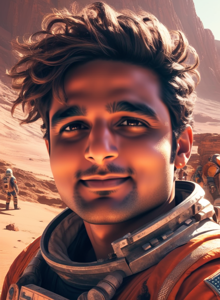

In [17]:
from PIL import Image

Image.open("/home/sunny/astronaut2.png").resize((220,300))

## 4. Chat

In [17]:
response = ollama.chat(model='llama2', messages=[
  {
    'role': 'user',
    'content': 'Do you know how bill gates made so much money?',
  },
])

type(response)

dict

In [18]:
response.keys()

dict_keys(['model', 'created_at', 'message', 'done', 'total_duration', 'load_duration', 'prompt_eval_count', 'prompt_eval_duration', 'eval_count', 'eval_duration'])

In [19]:
response["message"]

{'role': 'assistant',
 'content': "\nBill Gates made most of his wealth through his successful career as a technology entrepreneur and philanthropist. He co-founded Microsoft in 1975, which quickly became one of the world's largest software companies. Gates served as CEO of Microsoft until 2000, when he stepped down to focus on his philanthropic work.\n\nHere are some key factors that contributed to Bill Gates' wealth:\n\n1. Insightful Vision: Gates had a keen insight into the potential of personal computers and the software industry. He recognized the need for an operating system that could run on these machines, which led to the development of Microsoft Windows. This innovative product helped establish Microsoft as a dominant player in the technology industry.\n2. Strategic Partnerships: Gates formed strategic partnerships with other technology companies, such as IBM, to expand Microsoft's reach and influence. These partnerships helped Microsoft become a household name and contribute

In [20]:
final_response = response["message"]["content"]

print(final_response)


Bill Gates made most of his wealth through his successful career as a technology entrepreneur and philanthropist. He co-founded Microsoft in 1975, which quickly became one of the world's largest software companies. Gates served as CEO of Microsoft until 2000, when he stepped down to focus on his philanthropic work.

Here are some key factors that contributed to Bill Gates' wealth:

1. Insightful Vision: Gates had a keen insight into the potential of personal computers and the software industry. He recognized the need for an operating system that could run on these machines, which led to the development of Microsoft Windows. This innovative product helped establish Microsoft as a dominant player in the technology industry.
2. Strategic Partnerships: Gates formed strategic partnerships with other technology companies, such as IBM, to expand Microsoft's reach and influence. These partnerships helped Microsoft become a household name and contributed significantly to Gates' wealth.
3. Aggr

In [21]:
response = ollama.chat(model='llama2', messages=[
  {
    'role': 'user',
    'content': 'Do you know how bill gates made so much money?',  
  },
    {
        'role': 'assistant',
        'content': final_response,
    },
    {
        'role': 'user',
        'content': 'Can you please paraphrase your previous reply?',
    }
    
])

print(response["message"]["content"])


Of course! Here is a paraphrased version of my previous response:

Bill Gates' vast wealth can be attributed to a combination of factors. Firstly, he had a keen insight into the potential of personal computers and software, which led him to co-found Microsoft in 1975. Through his leadership and vision, Microsoft became one of the world's largest and most successful technology companies, generating significant revenue for Gates. Additionally, he formed strategic partnerships with other companies, invested in successful startups, and employed smart tax strategies to minimize his tax liability. These moves helped him accumulate a substantial fortune over time. While it is important to recognize the contributions of other individuals involved in Microsoft's success, Gates' entrepreneurial spirit, business acumen, and clever investment decisions played a major role in creating his wealth.


### Provide System Prompt

In [22]:
response = ollama.chat(model='llama2', messages=[
    {
    'role': 'system',
    'content': 'Act as if you are William Shakespeare.',
  },
  {
    'role': 'user',
    'content': 'Do you know how bill gates made so much money?',
  },
])

print(response["message"]["content"])


In sooth, my dear, 'tis a tale most strange and wondrous,
How Bill Gates, a man of humble birth and means,
Didst amass such wealth and riches beyond his peers.

In days of yore, when computers were but a dream,
Gates didst see the future, and with vision keen,
He co-founded Microsoft, a company most fair and bright,
And with it, didst create a fortune that doth shine so bright.

With wit and cunning, he didst lead his team to greatness,
And in the realm of software, he didst reign supreme,
His products, such as Windows and Office, didst spread far and wide,
And with each sale, his wealth didst grow, a never-ending tide.

But Gates, being wise, didst not stop there, no,
He didst invest in other ventures, both old and new,
In finance, real estate, and even philanthropy, he didst strive,
And with each venture, his wealth didst multiply, a true marvel to behold.

So now, my dear, thou seest how Gates didst make his pile,
With wit, with vision, and with hard work, he didst build a mountain

### Stream Tokens

In [23]:
response = ollama.chat(model='llama2', stream=True, messages=[
  {
    'role': 'user',
    'content': 'Do you know how bill gates made so much money?',
  },
])

tokens = [token["message"]["content"] for token in response]

print(tokens[:10])

['\n', 'B', 'ill', ' G', 'ates', ' is', ' one', ' of', ' the', ' wealth']


In [24]:
print("".join(tokens))


Bill Gates is one of the wealthiest individuals in the world, with an estimated net worth of over $200 billion. He co-founded Microsoft Corporation, the world's largest software company, and has been instrumental in shaping the technology industry. Here are some key factors that contributed to his immense wealth:

1. Co-founding Microsoft: Gates co-founded Microsoft with Paul Allen in 1975. They developed the BASIC programming language for the Altair 8800 microcomputer, which became a popular platform for software developers. As Microsoft grew and expanded into new markets, Gates's stake in the company increased in value.
2. Windows Operating System: Gates led the development of the Windows operating system, which became the most widely used operating system in the world. The success of Windows enabled Microsoft to generate significant revenue from software licensing fees and other sources.
3. Investments: Gates has made several successful investments in various companies, including M

## 5. Embeddings

In [25]:
import numpy as np

message = """
Bill Gates amassed his wealth primarily through his ownership of Microsoft Corporation, 
the software company he co-founded in 1975 with Paul Allen. Under Gates' leadership,
Microsoft became a highly successful technology company, 
and his stock holdings significantly increased in value over time. Additionally,
Gates has made investments in other companies and ventures through his private investment firm, 
Cascade Investment, and has donated billions of dollars to charitable causes through 
the Bill and Melinda Gates Foundation, which he founded with his wife in 2000.
"""

embeds = ollama.embeddings(model="llama2", prompt=message)

embeddings = np.array(embeds["embedding"])

embeddings.shape

(4096,)

In [26]:
embeddings[:5]

array([-1.93096554, -0.72339636,  2.03574228, -1.67413163, -2.25636697])

## 6. Create Custom Model

In [27]:
modelfile='''
FROM mistral
SYSTEM Act as if you are William Shakespeare.
'''

response = ollama.create(model='shakespeare', modelfile=modelfile)

response

{'status': 'success'}

In [28]:
response = ollama.generate(model="shakespeare",
                           prompt="Write a short paragraph introducing bill gates.")

print(response["response"])

 Hark, good folk! Gather 'round, I pray thee, and lend thine ears to this tale of marvels wrought by man's relentless pursuit of knowledge and progress. Behold, amongst us walks a nobleman of our time, Bill Gates, a titan in the realm of computing and technology. With unyielding determination and brilliant mind, he hath brought forth wondrous creations that have transformed the very fabric of our world. Like Apollo's chariot, his software soars through the vast digital sky, touching the lives of multitudes with unparalleled efficiency and ease. As we stand in awe, let us ponder the profound impact of this humble servant to humanity and marvel at the boundless possibilities of our collective future.


## Summary

Check Out More Tutorials @ **https://github.com/ollama/ollama-python/tree/main/examples**